In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
def generate_dataset(size, n_features, theta, std):
    import pandas as pd
    import numpy as np
    assert n_features == len(theta)
    theta = np.array(theta).reshape(len(theta), 1)
    df = pd.DataFrame()
    for i in range(n_features):
        mean = np.random.randint(2, 10)
        std = np.random.randint(2, 15)
        #print('mean : {}'.format(mean))
        #print('std : {}'.format(std))
        df['f_{}'.format(i+1)] = np.random.normal(mean, std, size)
    features_values = df[:].to_numpy()
    #print(features_values.shape)
    error = np.random.randn(size).reshape(size, 1)*std
    df['t'] = features_values.dot(theta) + error
    return df

In [152]:
def gradient(x, y, weights):
    x = x.to_numpy()
    y = y.to_numpy()
    print(x.shape)
    print(y.shape)
    print(weights.shape)
#     weights = weights.to_numpy()
    output = np.dot(np.transpose(x), (np.subtract(np.dot(x, weights), y)))
    print(output.shape)
    return output

In [153]:
def cost_function(weights, x, y):
#     j = np.mean(np.square(np.subtract(x.dot(weights), y)))/2
    j = np.mean(np.square(np.subtract(np.dot(x, weights), y)))/2
    return j.item()

In [154]:
def gradient_descent(x_train, y_train, alpha, batch_size, weights):
    from IPython.display import display, clear_output
    import time
    weights = np.array(weights).reshape(-1, 1)
    x_train_mod = x_train.copy()
    x_train_mod.insert(loc=0, column='f_0', value=np.ones(x_train.shape[0]))
    total_sample = len(y_train) # or length(x_train)
    k = alpha/batch_size
    j_prev = 100000000
    t = 0
    while True:
        for i in range(0 ,total_sample, batch_size):
#             print(i)
            x_data = x_train_mod.iloc[i:i+batch_size, :]
            y_data = y_train.iloc[i:i+batch_size, :]
            grad = gradient(x_data, y_data, weights)
#             print('grad : {}'.format(grad))
            weights = np.subtract(weights, k*grad)
#             print('weights : {}'.format(weights))
            j = cost_function(weights, x_data, y_data)
            display('Iteration '+str(t) + ' sample '+ str(i) + '-----j : {}'.format(j)+ '-----j_prev : {}'.format(j_prev))
#             print('j : {}'.format(j))
#             print('j_prev : {}'.format(j_prev))
            time.sleep(1)
            clear_output(wait=True)
            if abs(j - j_prev) < 0.001:
                break
            j_prev = j
        else:
            t += 1
            continue
        break
    return weights

In [155]:
def predict(x_test, weights):
    x_test.insert(loc=0, column='f_0', value = np.ones(x_test.shape[0]))
    x_test = x_test.to_numpy()
    output = np.dot(x_test, weights)
    return output

In [173]:
size = 1000
n_features = 3
theta = [1, 4, 3]
std = 10
initial_weights = [1, 1, 1, 1] # n + 1 length
alpha = 0.01
batch_size = 1000 
# we will use batch gradient descent here bcoz others will not converge,
#for others we have other implementation using alpha decay

In [174]:
a = generate_dataset(size, n_features, theta, std)
xtrain, xtest, ytrain, ytest = train_test_split(a.iloc[:, :-1], a.iloc[:, -1:], test_size=0.3)
w_output = gradient_descent(xtrain, ytrain, alpha, batch_size, initial_weights)
print(w_output)

[[0.99488134]
 [0.89926613]
 [3.97464366]
 [2.93319793]]


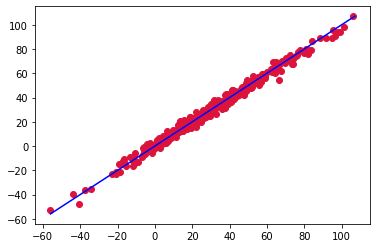

In [175]:
pred_values = predict(xtest, w_output)
# plt.scatter(ytest, pred_values, c='crimson')
# plt.plot(ytest, ytest, 'b-')
# plt.show()

plt.scatter(ytest, pred_values, c='crimson')
p1 = max(np.max(pred_values), float(ytest.max()))
p2 = min(np.min(pred_values), float(ytest.min()))
plt.plot([p1, p2], [p1, p2], 'b-') # the equation of x = y, (passes through origin)
plt.show()

In [ ]:
a

In [71]:
a.iloc[:, -1:]

,t
0,40.744903
1,48.319294
2,59.191626
3,29.368649
4,41.561711
5,60.345138
6,49.071717
7,10.435528
8,-8.800589
9,66.465639


In [111]:
np.ones(3).shape

(3,)

In [150]:
xtest

,f_0,f_1,f_2,f_3
553,1.0,18.559545,-0.046905,9.020142
691,1.0,9.737904,5.489347,-2.623160
908,1.0,15.174322,5.303047,7.235446
618,1.0,-5.142782,0.410412,4.101196
586,1.0,-8.854084,-4.448062,13.186638
...,...,...,...,...
413,1.0,15.338540,9.920062,-6.695662
167,1.0,3.729473,6.106491,9.096416
565,1.0,-3.847923,-2.485563,1.034624
522,1.0,-1.777741,4.084381,7.556390
